In [3]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/housingdataset/unemployment_rate.csv
/kaggle/input/housingdataset/CPI_Urban_Consumers.csv
/kaggle/input/housingdataset/housing_prices.csv
/kaggle/input/housingdataset/Housing_Supply.csv
/kaggle/input/housingdataset/housing_debt.csv


In [4]:
# Read datasets into dataframe from housing dataset:
unemploy_rate = pd.read_csv('../input/housingdataset/unemployment_rate.csv')
cpi_uc = pd.read_csv('../input/housingdataset/CPI_Urban_Consumers.csv')
housing_supply = pd.read_csv('../input/housingdataset/Housing_Supply.csv')
housing_price = pd.read_csv('../input/housingdataset/housing_prices.csv')

In [5]:
# convert date objects to datetime
unemploy_rate['observation_date'] = pd.to_datetime(unemploy_rate['observation_date'])
cpi_uc['observation_date'] = pd.to_datetime(cpi_uc['DATE'])
housing_supply['observation_date'] = pd.to_datetime(housing_supply['observation_date'])
housing_price['observation_date'] = pd.to_datetime(housing_price['observation_date'])

In [6]:
df1 = pd.merge(housing_price, unemploy_rate, on = ['observation_date'], how = 'left')
df2 = pd.merge(df1, housing_supply, on = ['observation_date'], how = 'left')
df_housing_rate = pd.merge(df2, cpi_uc, on = ['observation_date'], how = 'left')

In [7]:
# import libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# get info the number of rows and columns data type from housing dataset
df_housing_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  230 non-null    datetime64[ns]
 1   MSPUS             230 non-null    int64         
 2   UNRATE            230 non-null    float64       
 3   MSACSR            230 non-null    float64       
 4   DATE              230 non-null    object        
 5   CPILFESL          230 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 12.6+ KB


In [14]:
# check for null values
df_housing_rate.isnull().any()

observation_date    False
MSPUS               False
UNRATE              False
MSACSR              False
DATE                False
CPILFESL            False
year                False
month               False
day                 False
dtype: bool

In [9]:
# get column names from housing dataset
df_housing_rate.columns
#split date field into month year and day
df_housing_rate['year'] = pd.DatetimeIndex(df_housing_rate['observation_date']).year
df_housing_rate['month'] = df_housing_rate['observation_date'].dt.month
df_housing_rate['day'] = df_housing_rate['observation_date'].dt.day


In [ ]:
# descriptive statistics on housing dataset
df_housing_rate.describe()

In [10]:
df_housing_rate.head()

,observation_date,MSPUS,UNRATE,MSACSR,DATE,CPILFESL,year,month,day
0,1963-01-01,17800,5.7,4.7,1/1/1963,31.5,1963,1,1
1,1963-04-01,18000,5.7,5.3,4/1/1963,31.7,1963,4,1
2,1963-07-01,17900,5.6,4.6,7/1/1963,31.8,1963,7,1
3,1963-10-01,18500,5.5,5.9,10/1/1963,32.0,1963,10,1
4,1964-01-01,18500,5.6,5.8,1/1/1964,32.2,1964,1,1


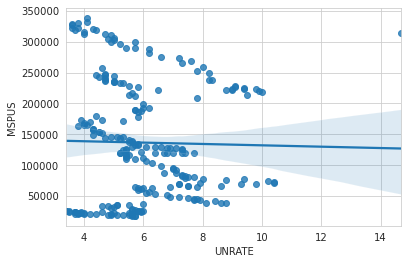

In [11]:
# Correlation between unemployment rate and average housing price in US
sns.set_style("whitegrid")
sns.regplot(x = df_housing_rate['UNRATE'], y = df_housing_rate['MSPUS'])
plt.show()

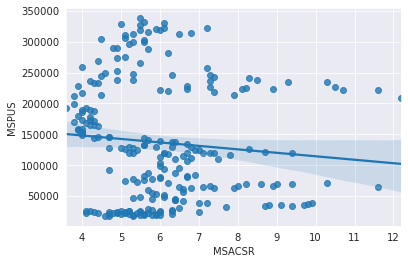

In [12]:
# Correlation between housing supply and average housing price in US
sns.set_style("darkgrid")
sns.regplot(x = df_housing_rate['MSACSR'], y = df_housing_rate['MSPUS'])
plt.show()

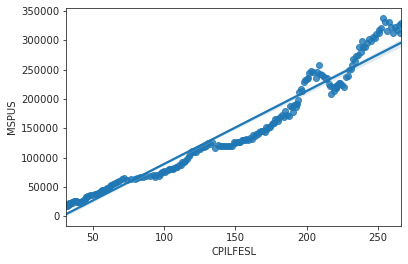

In [13]:
# Correlation between consumer pricing index and average housing price in US
sns.set_style("ticks")
sns.regplot(x = df_housing_rate['CPILFESL'], y = df_housing_rate['MSPUS'])
plt.show()

In [ ]:
Conclusion: **There is a strong postitive Linear correlation between 
    consumer pricing index and average housing price**